In [55]:

%load_ext autoreload
%autoreload 2
import data_arbres as da
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
data = da.load_data("tp_donnees.csv")

In [ ]:
racine = da.Noeud(15)
pe = racine.proba_empirique(data)
print(pe)


{0: 0.5913875598086125, 1: 0.40861244019138754}

In [58]:
racine.question_inf(data[0].x, "Age", 50)

True

In [59]:
d1, d2 = racine.split(data, ("Age", 20))
print(d1)
print(d2)

[x: {'Classe': 3.0, 'Nationalite': 0.0, 'Age': 13.0, 'Nombre de freres/soeurs': 0.0, 'Nombre d enfants/parents a bord': 2.0, 'Prix du ticket': 20.25, 'Genre': 0.0}, y: 0, x: {'Classe': 3.0, 'Nationalite': 0.0, 'Age': 16.0, 'Nombre de freres/soeurs': 1.0, 'Nombre d enfants/parents a bord': 1.0, 'Prix du ticket': 20.25, 'Genre': 0.0}, y: 0, x: {'Classe': 3.0, 'Nationalite': 2.0, 'Age': 16.0, 'Nombre de freres/soeurs': 0.0, 'Nombre d enfants/parents a bord': 0.0, 'Prix du ticket': 7.65, 'Genre': 1.0}, y: 1, x: {'Classe': 3.0, 'Nationalite': 2.0, 'Age': 18.0, 'Nombre de freres/soeurs': 0.0, 'Nombre d enfants/parents a bord': 0.0, 'Prix du ticket': 7.2292, 'Genre': 1.0}, y: 1, x: {'Classe': 3.0, 'Nationalite': 1.0, 'Age': 0.8333, 'Nombre de freres/soeurs': 0.0, 'Nombre d enfants/parents a bord': 1.0, 'Prix du ticket': 9.35, 'Genre': 0.0}, y: 1, x: {'Classe': 3.0, 'Nationalite': 2.0, 'Age': 18.0, 'Nombre de freres/soeurs': 0.0, 'Nombre d enfants/parents a bord': 1.0, 'Prix du ticket': 9.35, 

In [60]:
liste = racine.list_separ_attributs(data, "Prix du ticket")
print(liste)

[('Prix du ticket', 1.5854), ('Prix du ticket', 3.59165), ('Prix du ticket', 4.50625), ('Prix du ticket', 5.61875), ('Prix du ticket', 6.3375), ('Prix du ticket', 6.44375), ('Prix du ticket', 6.4729), ('Prix du ticket', 6.6229), ('Prix du ticket', 6.85), ('Prix du ticket', 6.9625), ('Prix du ticket', 6.9875), ('Prix du ticket', 7.0229), ('Prix du ticket', 7.0479), ('Prix du ticket', 7.052099999999999), ('Prix du ticket', 7.0896), ('Prix du ticket', 7.13335), ('Prix du ticket', 7.18335), ('Prix du ticket', 7.2271), ('Prix du ticket', 7.239599999999999), ('Prix du ticket', 7.26665), ('Prix du ticket', 7.38955), ('Prix du ticket', 7.5083), ('Prix du ticket', 7.5354), ('Prix du ticket', 7.5646), ('Prix du ticket', 7.6042000000000005), ('Prix du ticket', 7.6396), ('Prix du ticket', 7.6875), ('Prix du ticket', 7.72915), ('Prix du ticket', 7.7375), ('Prix du ticket', 7.74585), ('Prix du ticket', 7.7625), ('Prix du ticket', 7.7854), ('Prix du ticket', 7.7979), ('Prix du ticket', 7.8104), ('Pri

In [61]:
questions = racine.liste_questions(data)
len(questions)

368

In [62]:
racine.entropie(data)

0.9757661302191036

In [63]:
racine.gain_entropie(data, ('Genre', 0.5))

0.2153838940211723

In [64]:
racine.best_split(data)

('Genre', 0.5)

In [65]:
racine.grow(data)


In [66]:
print(racine.proba)

None


In [67]:
for i in range(25):
    print(racine.prediction(data[i].x))
    

{0: 1.0}
{0: 1.0}
{0: 1.0}
{1: 1.0}
{1: 1.0}
{1: 1.0}
{0: 1.0}
{1: 1.0}
{1: 0.5, 0: 0.5}
{1: 1.0}
{0: 1.0}
{0: 1.0}
{0: 1.0}
{1: 1.0}
{1: 1.0}
{1: 0.3076923076923077, 0: 0.6923076923076923}
{0: 1.0}
{0: 1.0}
{1: 0.5, 0: 0.5}
{0: 1.0}
{0: 1.0}
{1: 1.0}
{0: 0.9130434782608695, 1: 0.08695652173913043}
{1: 1.0}
{0: 1.0}


In [68]:
precision_resultat = racine.precision(data)
print(precision_resultat)

96.55502392344498


In [69]:
train_x, test_x = racine.split_train_test(data)
print(len(data))
print(len(train_x))
print(len(test_x))

1045
836
209


In [ ]:
train, test = racine.split_train_test(data)
train_accuracies = []
test_accuracies = []

depth = 30  
for max_depth in range(depth):
    racine = da.Noeud(profondeur_max=max_depth)
    racine.grow(train)
    train_accuracies.append(racine.precision(train))
    
    test_accuracies.append(racine.precision(test))


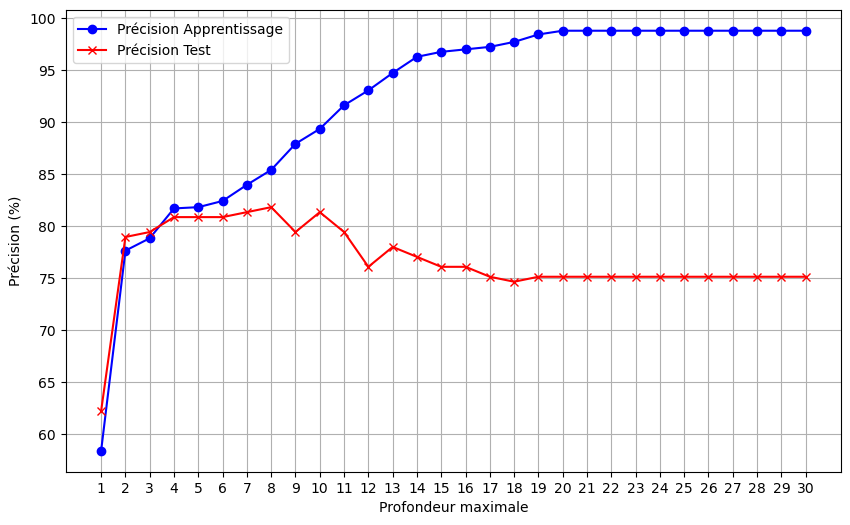

In [71]:
plt.figure(figsize=(10, 6))

plt.plot(range(1,depth+1), train_accuracies, label="Précision Apprentissage", color="blue", marker="o")
plt.plot(range(1,depth+1), test_accuracies, label="Précision Test", color="red", marker="x")
plt.xlabel("Profondeur maximale")
plt.ylabel("Précision (%)")
plt.xticks(ticks=[x for x in range(1, len(train_accuracies) + 1, 1)]) 
plt.legend()
plt.grid()
plt.show()

# Influence de la profondeur maximale
La profondeur maximale d’un arbre de décision détermine combien de fois il peut diviser les données. Cela a un impact direct sur les performances :

### Faible profondeur maximale (profondeur > 8):
L’arbre est trop simple, ne capte pas assez de détails.
<br>Résultat :<br>
***Faible précision sur les deux ensembles (sous-apprentissage).
### Profondeur modérée ( 1 < profondeur < 8) :
L’arbre trouve un bon équilibre entre complexité et généralisation.

<br> Résultat : <br>
***La précision s’améliore sur les deux ensembles et atteint un maximum sur la base de test.<br>
***Bonne précision sur les deux ensembles.
### Profondeur trop grande (profondeur == 1):
L’arbre devient trop complexe, s’adapte parfaitement aux données d’apprentissage.
<br>Résultat :<br>
***Très haute précision sur les données d’apprentissage (sur-apprentissage).<br>
***Mauvaise précision sur les données de test (faible généralisation).

Précision après élagage (Train): 58.3732057416268
Précision après élagage (Test): 62.20095693779905
Longueur de train_accuracies: 20
Longueur de test_accuracies: 20


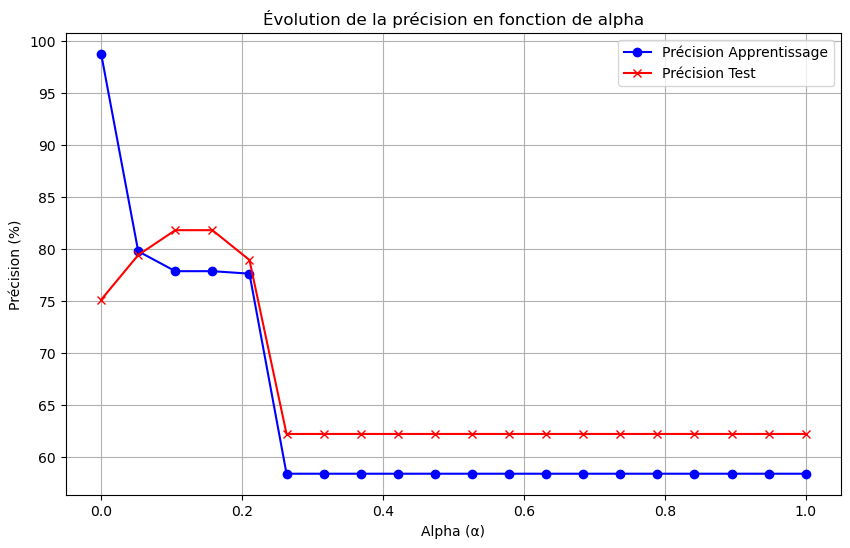

In [72]:
train_accuracies = []
test_accuracies = []

for alpha in np.linspace(0, 1,20):  
    racine.grow(train)  
    
    racine.elagage(alpha)
  
    train_accuracy = racine.precision(train)
    train_accuracies.append(train_accuracy)
    
 
    test_accuracy = racine.precision(test)
    test_accuracies.append(test_accuracy)

racine.elagage(alpha)

print("Précision après élagage (Train):", racine.precision(train))
print("Précision après élagage (Test):", racine.precision(test))


print("Longueur de train_accuracies:", len(train_accuracies))
print("Longueur de test_accuracies:", len(test_accuracies))


plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 1,20), train_accuracies, label="Précision Apprentissage", color="blue", marker="o")
plt.plot(np.linspace(0, 1,20), test_accuracies, label="Précision Test", color="red", marker="x")
plt.xlabel("Alpha (α)")
plt.ylabel("Précision (%)")
plt.legend()
plt.grid(True)
plt.title("Évolution de la précision en fonction de alpha")
plt.show()

## Analyse du graphique

Le graphique montre l'évolution de la précision sur les ensembles d'apprentissage (train) et de test en fonction de la valeur de `alpha`, utilisée pour l'élagage de l'arbre de décision.

### Observations :
1. **Diminution de la précision sur l'ensemble d'apprentissage (train)** :
   Au fur et à mesure que la valeur de `alpha` augmente, la précision sur l'ensemble d'apprentissage diminue. Cela s'explique par le fait que l'élagage réduit la taille de l'arbre, supprimant certaines branches qui étaient adaptées spécifiquement aux données d'apprentissage. Cela peut entraîner une légère perte de performance sur l'ensemble d'apprentissage, car l'arbre devient moins complexe et moins ajusté aux spécificités des données.

2. **Augmentation de la précision sur l'ensemble de test (test)** :
   Initialement, lorsque `alpha` augmente, la précision sur l'ensemble de test augmente. Cela peut être dû à la réduction du surapprentissage (overfitting) : l'élagage permet à l'arbre de mieux généraliser, en éliminant des branches qui s'adaptaient trop spécifiquement aux données d'apprentissage. Un modèle plus simple et moins complexe est généralement mieux à même de prédire sur de nouvelles données (test).

3. **Chute des précisions pour de grandes valeurs de alpha** :
   Après un certain point, tant la précision sur l'ensemble d'apprentissage que celle sur l'ensemble de test chutent. Cela se produit probablement lorsque l'élagage devient trop agressif et supprime des branches importantes, ce qui réduit la capacité du modèle à s'ajuster correctement aux données d'apprentissage et à généraliser sur les données de test. À ce stade, l'arbre est trop simplifié, ce qui entraîne une perte de performance pour les deux ensembles.

### Conclusion :
L'élagage avec un alpha modéré permet d'obtenir un bon compromis entre la complexité du modèle et la capacité de généralisation. Toutefois, des valeurs d'alpha trop grandes peuvent entraîner une perte d'informations importantes et nuire à la performance du modèle. Il est donc crucial de choisir une valeur d'alpha qui équilibre bien la précision sur les ensembles d'apprentissage et de test.
